<a href="https://colab.research.google.com/github/Keyrama/Machine-Learning/blob/main/MnistCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(f'Training set: {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_valid.shape}, {y_valid.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set: (48000, 28, 28), (48000,)
Validation set: (12000, 28, 28), (12000,)
Test set: (10000, 28, 28), (10000,)


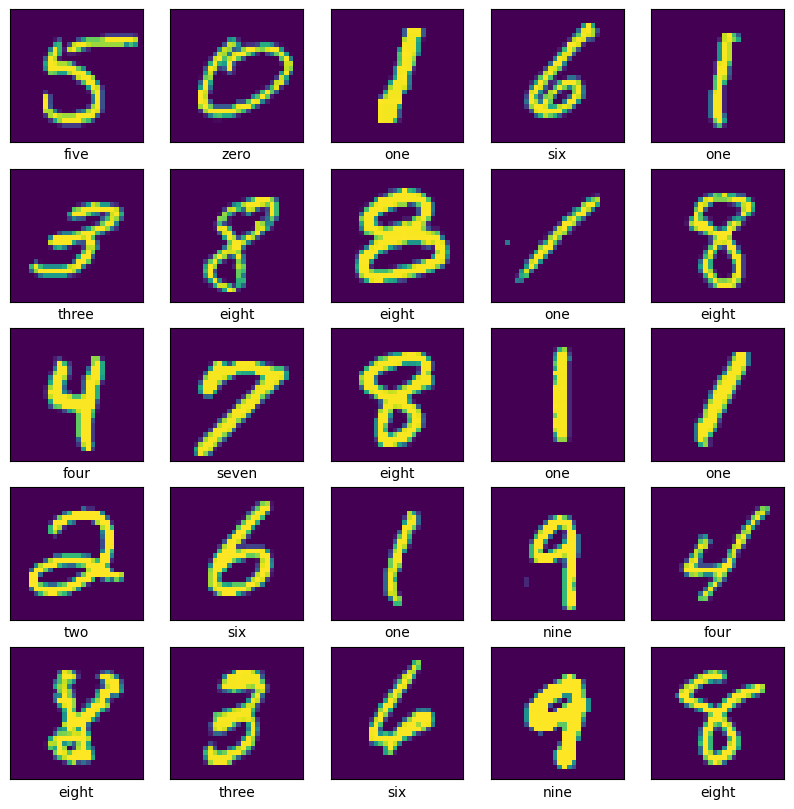

In [3]:
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.8738 - loss: 0.4047 - val_accuracy: 0.9767 - val_loss: 0.0765
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 36ms/step - accuracy: 0.9844 - loss: 0.0516 - val_accuracy: 0.9840 - val_loss: 0.0545
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9888 - loss: 0.0386 - val_accuracy: 0.9863 - val_loss: 0.0451
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9849 - val_loss: 0.0561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9944 - loss: 0.0163 - val_accuracy: 0.9896 - val_loss: 0.0363
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9847 - val_loss: 0.0672
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9965 -

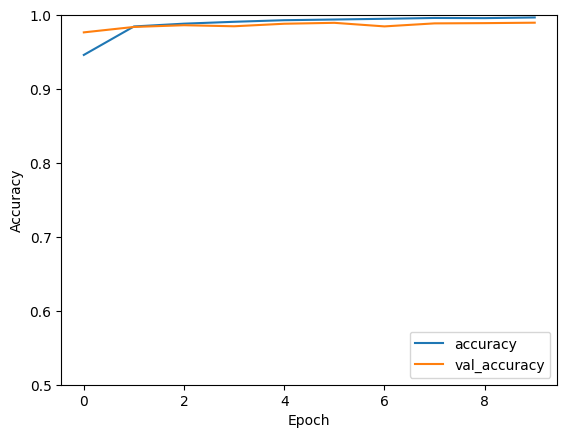

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - 10ms/step - accuracy: 0.9920 - loss: 0.0332


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


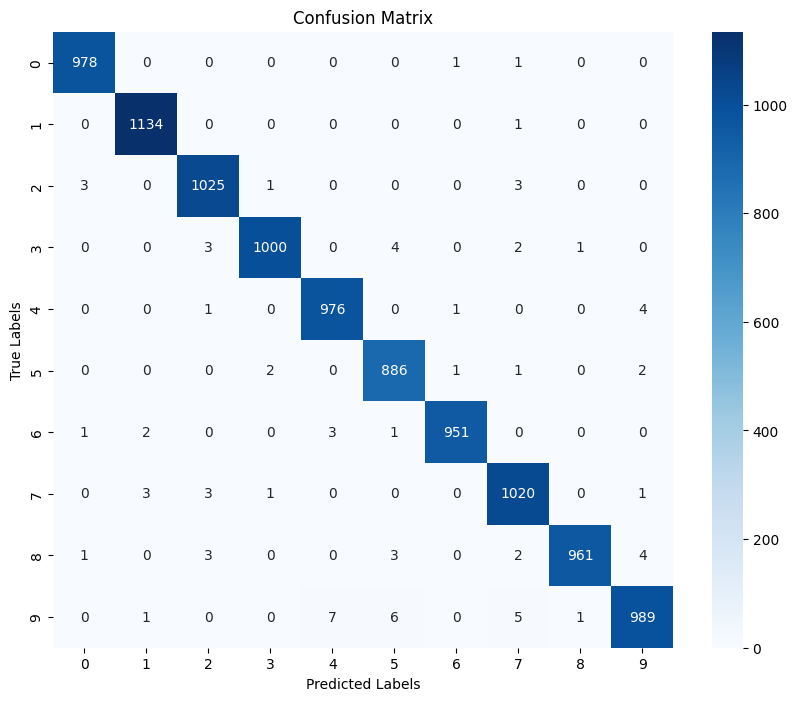

In [11]:
# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()